# SBI Insurance Claim Prediction

This is "SBI Insurance Claim Prediction Dataset" which based on "[Medical Cost Personal Datasets][1]" to update sample value on top.

The features of the dataset includes:

1) age : age of policyholder 

2) sex: gender of policy holder (female=0, male=1) 

3) bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 25 

4) steps: average walking steps per day of policyholder 

5) children: number of children / dependents of policyholder 

6) smoker: smoking state of policyholder (non-smoke=0;smoker=1) 

7) region: the residential area of policyholder in the US (northeast=0, northwest=1, southeast=2, southwest=3) 

8) charges: individual medical costs billed by health insurance 

9) insuranceclaim: yes=1, no=0

### Essential libraries and modules.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
# check RAM
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

Your runtime has 4.2 gigabytes of available RAM



In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/SBI_Life_insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [8]:
df.shape

(1338, 8)

In [9]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [10]:
df.info

<bound method DataFrame.info of       age  sex     bmi  children  smoker  region      charges  insuranceclaim
0      19    0  27.900         0       1       3  16884.92400               1
1      18    1  33.770         1       0       2   1725.55230               1
2      28    1  33.000         3       0       2   4449.46200               0
3      33    1  22.705         0       0       1  21984.47061               0
4      32    1  28.880         0       0       1   3866.85520               1
...   ...  ...     ...       ...     ...     ...          ...             ...
1333   50    1  30.970         3       0       1  10600.54830               0
1334   18    0  31.920         0       0       0   2205.98080               1
1335   18    0  36.850         0       0       2   1629.83350               1
1336   21    0  25.800         0       0       3   2007.94500               0
1337   61    0  29.070         0       1       1  29141.36030               1

[1338 rows x 8 columns]>

In [12]:
df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [13]:
# checking duplicates values in dataset:
df.duplicated().sum()

1

In [15]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

In [14]:
# Checking null values in dataset
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [16]:
df.nunique()

age                 47
sex                  2
bmi                548
children             6
smoker               2
region               4
charges           1337
insuranceclaim       2
dtype: int64

<AxesSubplot:>

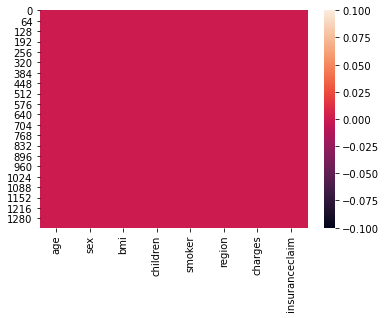

In [17]:
sns.heatmap(df.isnull())

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
sex,1338.0,0.505232,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
smoker,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000
region,1338.0,1.515695,1.104885,0.0000,1.00000,2.000,2.000000,3.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801
insuranceclaim,1338.0,0.585202,0.492871,0.0000,0.00000,1.000,1.000000,1.00000


In [ ]:
df.loc[(df['maxamnt_loans30']!=6.0)&(df['maxamnt_loans30']!=12.0)&(df['maxamnt_loans30']!=0.0),'maxamnt_loans30']

In [19]:
df['charges'].value_counts()

1639.56310     2
11987.16820    1
7624.63000     1
12523.60480    1
10355.64100    1
              ..
62592.87309    1
18903.49141    1
8538.28845     1
11165.41765    1
60021.39897    1
Name: charges, Length: 1337, dtype: int64

In [20]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes != 'O']
print(numerical_features)

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges', 'insuranceclaim']


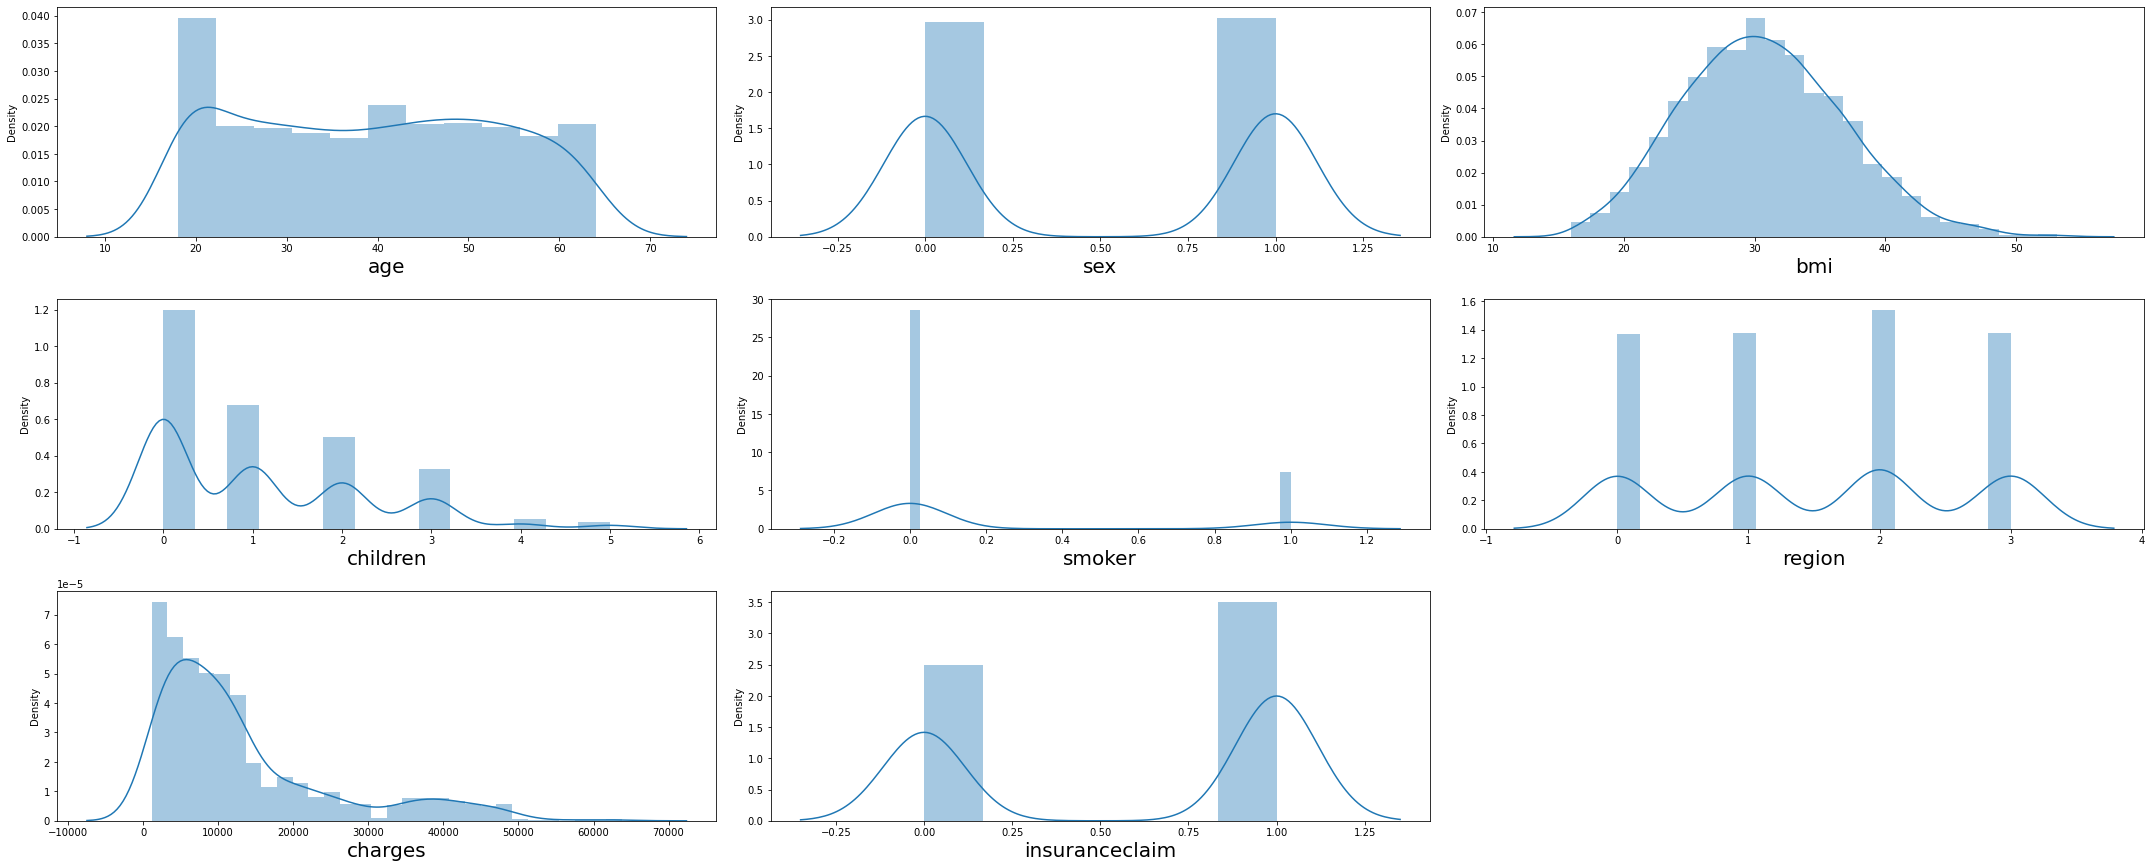

In [21]:
#distribution plot of numerical features
plt.figure(figsize=(30,40))
plotnumber=1
for column in numerical_features:
    if plotnumber <=30:
        ax=plt.subplot(10,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

<AxesSubplot:ylabel='smoker'>

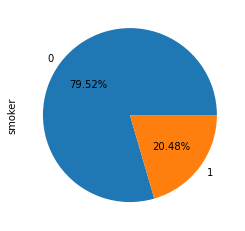

In [25]:
df['smoker'].value_counts().plot.pie(autopct="%2.2f%%")

Non-Smokers % is approximately 80% of peoples are Non-smokers who took policy and 20 % of peoples are smokers .

Approximately 1340 persons are there ,these persons live in four different regions and to know in which reason most of the policy holder are there i'm going to use countplot

Text(0.5, 1.0, 'regions')

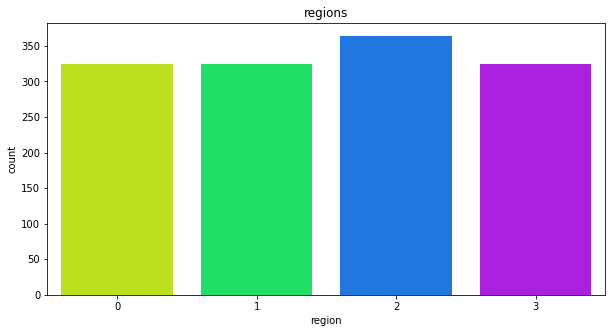

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(df['region'],palette='hsv')
plt.title("regions")

<AxesSubplot:ylabel='region'>

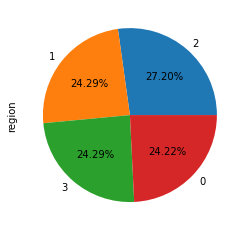

In [29]:
df['region'].value_counts().plot.pie(autopct="%2.2f%%")

Only little bit difference among three regions 0,1 and 3 these three regions policy holders live equal percentage .Only in 2nd region policy holders live 27.20%



<AxesSubplot:title={'center':'region vs sex'}, xlabel='sex', ylabel='region'>

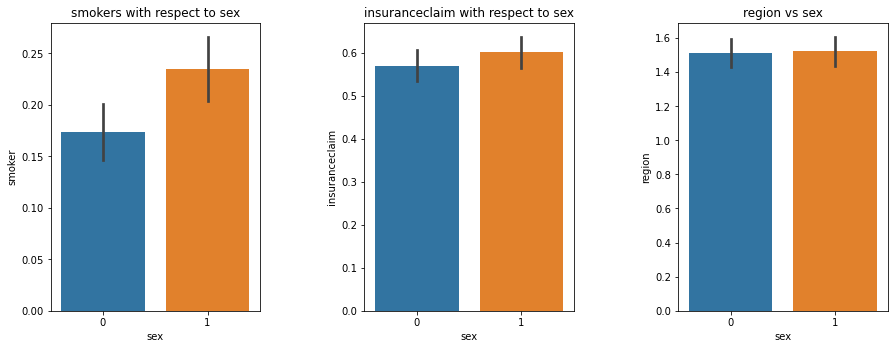

In [31]:
# Relation between Smoker, sex, insuranceclaim and region 

plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(131)
plt.title('smokers with respect to sex')
sns.barplot(x="sex", y="smoker", data=df)
plt.subplot(132)
plt.title('insuranceclaim with respect to sex')
sns.barplot(x="sex", y="insuranceclaim", data=df)
plt.subplot(133)
plt.title('region vs sex')
sns.barplot(x="sex", y="region", data=df)

Here observed that Most of the peoples who smoke they are Males compared to Females. So, Higher number of Males are clamed Insurance compared to Females.



<AxesSubplot:xlabel='age', ylabel='charges'>

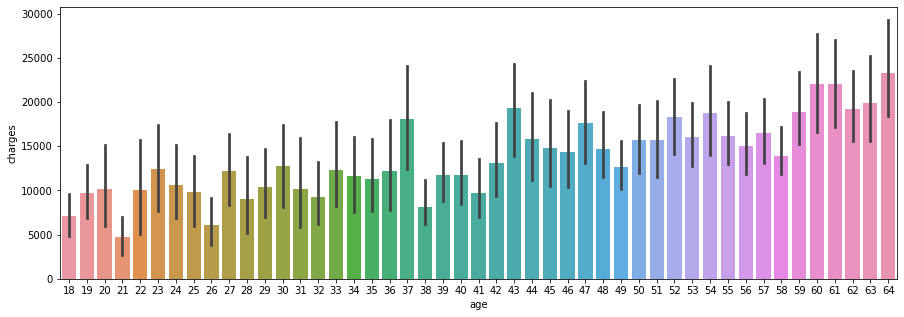

In [35]:
plt.figure(figsize=(15,5))
sns.barplot(x="age", y="charges", data=df)

from here we can observe one thing i.e is if age is increases then automatically charges are going to high

and whose age is 21 those peoples Medical cost is low and whose age is above 60 Medical cost is high

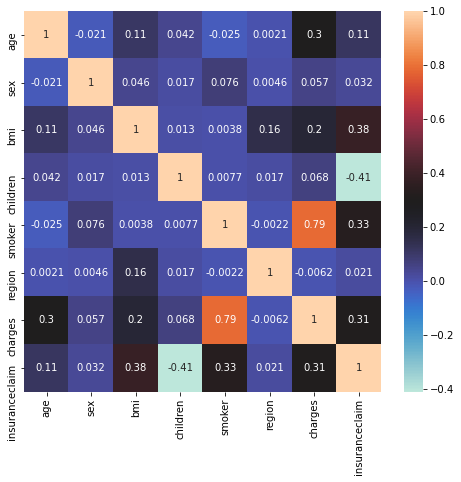

In [43]:
#check Cor-relation
corr_hmap=df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True,cmap='icefire')
plt.show()

Insurance Claim for Children is very low and you may see above it's -0.41 and i think it's better to remove children columns



<AxesSubplot:xlabel='children', ylabel='charges'>

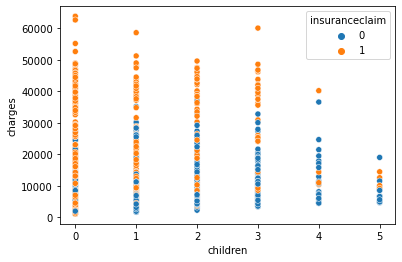

In [47]:
sns.scatterplot(x='children',y='charges',hue='insuranceclaim',data =df)

It's clear that who have insurance claim number of dependent childrens are very less and if childrens are there for them medical cost minimum price is 0 and maximum charges is below 35000



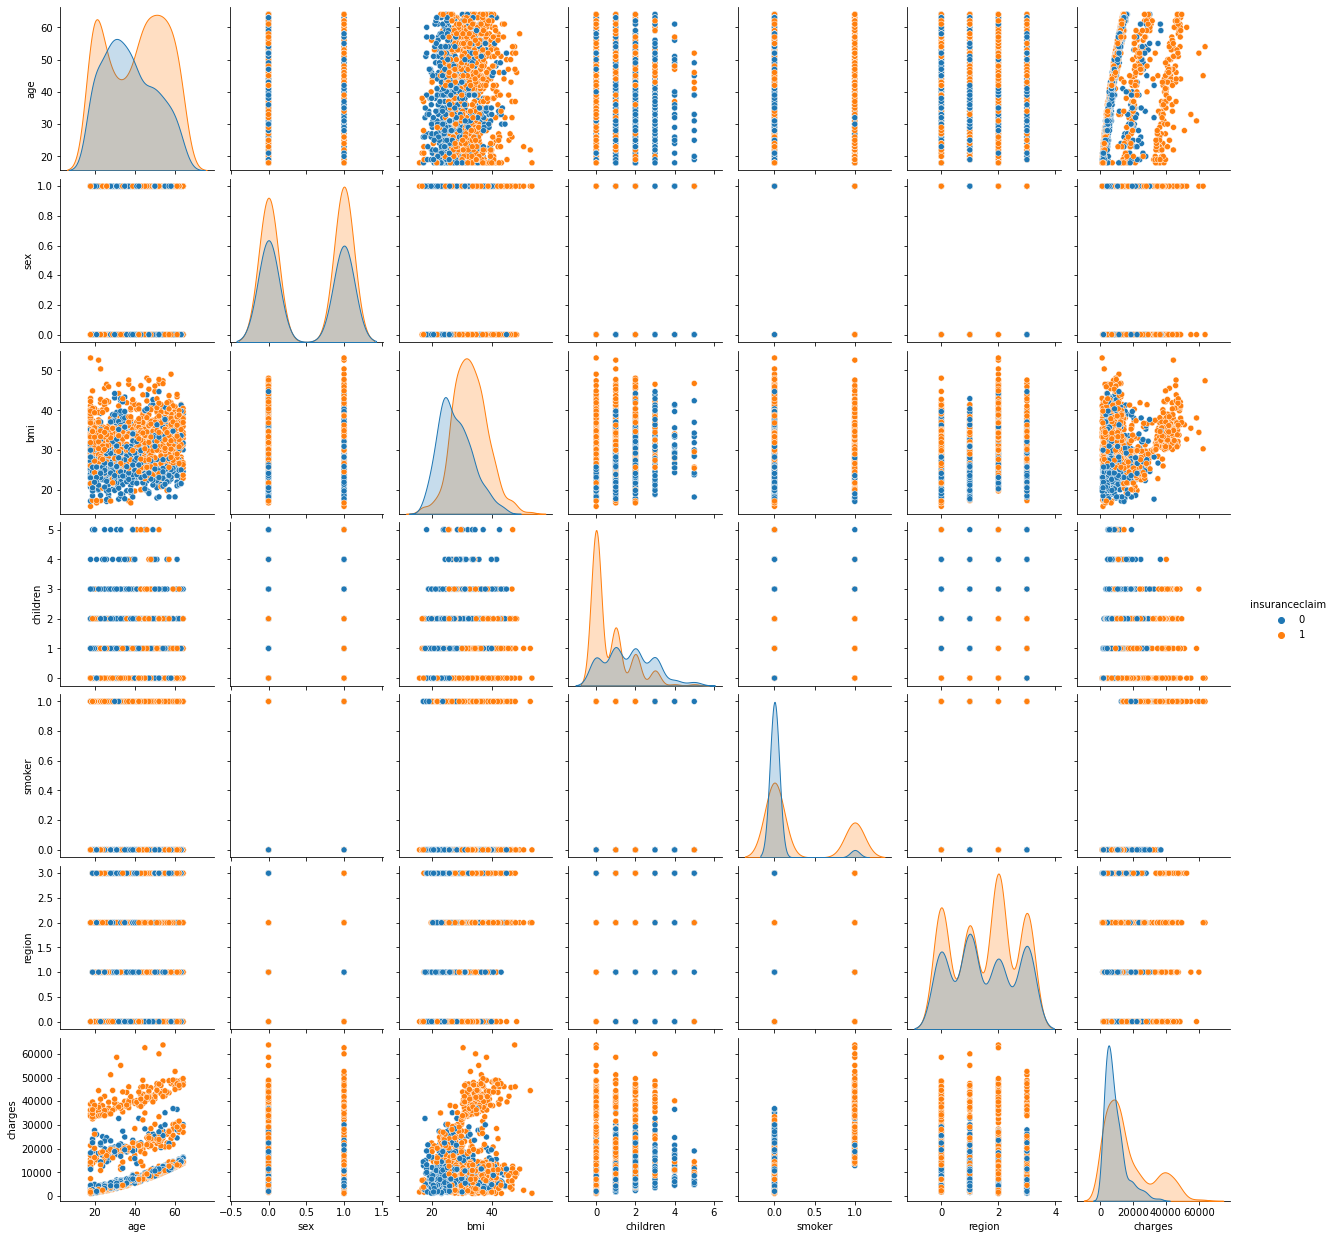

In [48]:
sns.pairplot(df ,hue ='insuranceclaim', vars =['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'])

<AxesSubplot:xlabel='age', ylabel='count'>

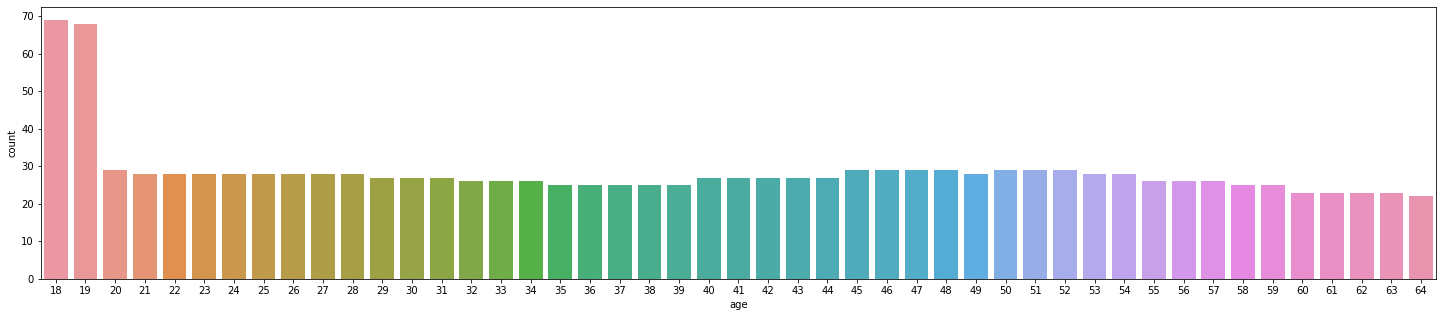

In [50]:
# Age 
plt.figure(figsize=(25,5))
sns.countplot(df['age'])

## Identifying /Removing Outliers

<AxesSubplot:>

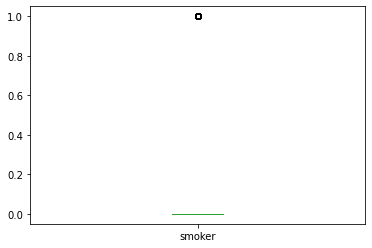

In [53]:
df['smoker'].plot.box()

age                  AxesSubplot(0.125,0.536818;0.133621x0.343182)
sex               AxesSubplot(0.285345,0.536818;0.133621x0.343182)
bmi                AxesSubplot(0.44569,0.536818;0.133621x0.343182)
children          AxesSubplot(0.606034,0.536818;0.133621x0.343182)
smoker            AxesSubplot(0.766379,0.536818;0.133621x0.343182)
region                  AxesSubplot(0.125,0.125;0.133621x0.343182)
charges              AxesSubplot(0.285345,0.125;0.133621x0.343182)
insuranceclaim        AxesSubplot(0.44569,0.125;0.133621x0.343182)
dtype: object

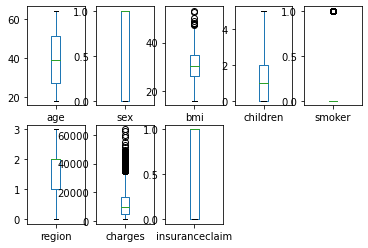

In [57]:
df.plot(kind='box',subplots=True,layout=(2,5))

### Z-Score

In [59]:
# Z-score
from scipy.stats import zscore
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]
df_new.shape

(1309, 8)

In [60]:
#removing Outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.43876426, 1.0105187 , 0.45332   , ..., 1.34390459, 0.2985838 ,
        0.84190989],
       [1.50996545, 0.98959079, 0.5096211 , ..., 0.43849455, 0.95368917,
        0.84190989],
       [0.79795355, 0.98959079, 0.38330685, ..., 0.43849455, 0.72867467,
        1.18777557],
       ...,
       [1.50996545, 1.0105187 , 1.0148781 , ..., 0.43849455, 0.96159623,
        0.84190989],
       [1.29636188, 1.0105187 , 0.79781341, ..., 1.34390459, 0.93036151,
        1.18777557],
       [1.55168573, 1.0105187 , 0.26138796, ..., 0.46691549, 1.31105347,
        0.84190989]])

In [61]:
#Seprate the categorical columns and Numerical columns
cat_df,num_df=[],[]

for i in df.columns:
    if df[i].dtype==object:
        cat_df.append(i)
    elif (df[i].dtypes=='int64') | (df[i].dtypes=='float64') | (df[i].dtypes=='int32'):
        num_df.append(i)
    else: continue
        
print('Total Number of Feature::', df.shape[1])
print('Number of categorical features::', len(cat_df))
print('Number of Numerical Feature::', len(num_df))

Total Number of Feature:: 8
Number of categorical features:: 0
Number of Numerical Feature:: 8


## Check and remove Skewness

<AxesSubplot:xlabel='bmi', ylabel='Density'>

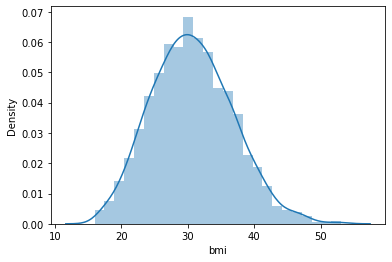

In [62]:
sns.distplot(df['bmi'])

In [67]:
x=df.iloc[:,:-1]

for col in x.columns:
    if x.skew().loc[col]>0.55:
        x[col]=np.log1p(x[col])
x.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.264083
smoker      1.464766
region     -0.038101
charges    -0.089817
dtype: float64

## CDF & PDF:

[6.39436796e-05 4.74805681e-05 1.53894304e-05 1.02596202e-05
 4.17542684e-06 7.03857668e-06 6.79998086e-06 3.81753311e-06
 2.38595820e-07 4.77191639e-07]
[ 1121.8739    7386.729311 13651.584722 19916.440133 26181.295544
 32446.150955 38711.006366 44975.861777 51240.717188 57505.572599
 63770.42801 ]


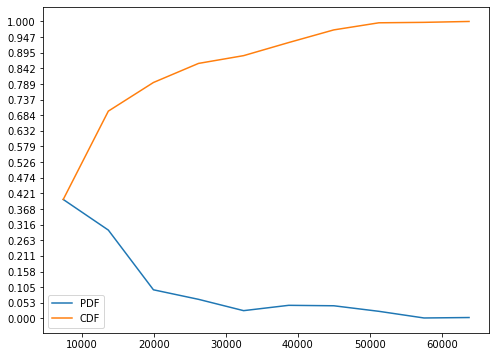

In [68]:
df_insuranceclaim = df.loc[:,"charges"]
count,bin_edges=np.histogram(df_insuranceclaim,bins=10,density=True)  #density=True gives normalized form od bin_edges and count
print(count)
print(bin_edges)
PDF=count/sum(count)

CDF=np.cumsum(PDF)  #cdf is sum of all pdf values

plt.figure(figsize=(8,6))
plt.plot(bin_edges[1:],PDF,label="PDF")
plt.plot(bin_edges[1:],CDF,label="CDF")
plt.yticks(np.linspace(0,1,20))
plt.legend(loc="lower left")
plt.show()

## Train & Test split:

In [74]:
y=df.iloc[:,-1:]
y.head()

,insuranceclaim
0,1
1,1
2,0
3,0
4,1


In [77]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)
x.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0.000000,0.693147,3,9.734236
1,18,1,33.770,0.693147,0.000000,2,7.453882
2,28,1,33.000,1.386294,0.000000,2,8.400763
3,33,1,22.705,0.000000,0.000000,1,9.998137
4,32,1,28.880,0.000000,0.000000,1,8.260455


In [78]:
# For each X, calculate VIF and save in dataframe

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

vif.round(1)

,VIF Factor,features
0,12.5,age
1,2.0,sex
2,27.8,bmi
3,2.2,children
4,1.7,smoker
5,2.9,region
6,49.9,charges


In [80]:
#Applying Standard Scaling to get optimized result

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
x.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0.000000,0.693147,3,9.734236
1,18,1,33.770,0.693147,0.000000,2,7.453882
2,28,1,33.000,1.386294,0.000000,2,8.400763
3,33,1,22.705,0.000000,0.000000,1,9.998137
4,32,1,28.880,0.000000,0.000000,1,8.260455


In [81]:
# Algorithms
from sklearn.svm import SVC, LinearSVC
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score,f1_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold

## Models:

In [82]:
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
lg=LogisticRegression()
knc=KNeighborsClassifier()
sgc=SGDClassifier()

### Prepare Models

In [89]:
models=[]
models.append(('DecisionTreeClassifier',dtc))
models.append(('RandomForestClassifier',rfc))
models.append(('KNeighborsClassifier',knc))
models.append(('SGDClassifier',sgc))
models.append(('LogisticRegression',lg))

In [98]:
ensemble=[RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),SGDClassifier(),LogisticRegression()]
for i in ensemble:
    i.fit(x_train,y_train)
    print(i,'\n score: ',i.score(x_train,y_train)*100)
    pred=i.predict(x_test)
    print(' F1 score:',f1_score(y_test,pred)*100)
    print('Accuracy scoer:',accuracy_score(y_test,pred)*100)
    scores=cross_val_score(i,x_train,y_train,cv=5).mean()*100
    print('\n Cross value score',scores)
    print('Confusion_matrix:\n',confusion_matrix(y_test,pred))
    print('Classification report:\n',classification_report(y_test,pred))
    print('\n')

RandomForestClassifier() 
 score:  100.0
 F1 score: 94.58483754512635
Accuracy scoer: 94.40298507462687

 Cross value score 94.11214953271028
Confusion_matrix:
 [[122   1]
 [ 14 131]]
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       123
           1       0.99      0.90      0.95       145

    accuracy                           0.94       268
   macro avg       0.94      0.95      0.94       268
weighted avg       0.95      0.94      0.94       268



DecisionTreeClassifier() 
 score:  100.0
 F1 score: 96.45390070921987
Accuracy scoer: 96.26865671641791

 Cross value score 98.78504672897196
Confusion_matrix:
 [[122   1]
 [  9 136]]
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       123
           1       0.99      0.94      0.96       145

    accuracy                           0.96       268
   macro avg       0.96      0.96    

In [113]:
n_estimators=[int(x) for x in np.linspace(start=0,stop=100,num=10)]
max_features=['auto','sqrt','log2']
criterion=['gini','entropy']
max_depth=[2,4]
min_samples_split=[1,2]
bootstrap=[True,False]

In [114]:
para_grid={'n_estimators':n_estimators,
          'max_features':max_features,
          'criterion':criterion,
          'max_depth':max_depth,
          'min_samples_split':min_samples_split,
          'bootstrap':bootstrap}

In [116]:
grid=GridSearchCV(RandomForestClassifier(),para_grid,n_jobs=-1)
grid.fit(x_train,y_train)
grid.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 33}

In [117]:
grid_predictions=grid.predict(x_test)
grid_predictions

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0], dtype=int64)

In [118]:
cn=confusion_matrix(y_test,grid_predictions)
cn

array([[104,  19],
       [ 22, 123]], dtype=int64)

In [119]:
accuracy_score(y_test,grid_predictions)

0.8470149253731343

## Predicting Values


In [120]:
pred=dtc.predict(x_test)
print('predicted insurance claim:',pred)
print('actual insurance claim',y_test)

predicted insurance claim: [0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1
 1 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0
 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1
 1 1 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1
 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1
 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1
 1 1 1 0 0 0 0 1 0]
actual insurance claim       insuranceclaim
910                0
823                1
677                1
559                1
1169               1
...              ...
1080               0
699                0
1127               0
1032               1
920                0

[268 rows x 1 columns]


### ROC & AUC SCORE:

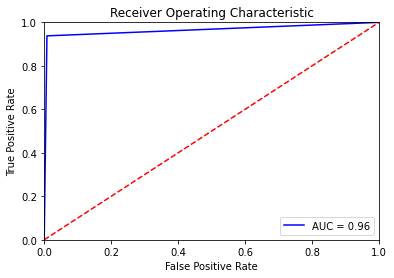

In [122]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

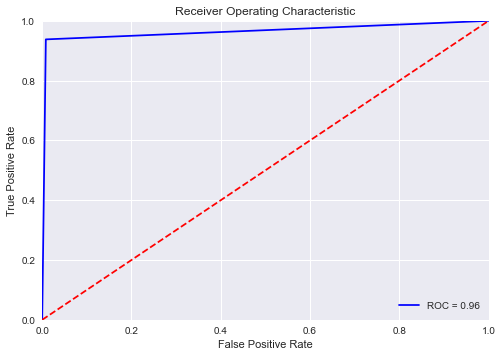

In [142]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'ROC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [127]:
rf=RandomForestClassifier(bootstrap=False,criterion='gini',max_depth=None,max_features='sqrt',min_samples_split=7,n_estimators=77)
rf.fit(x_train,y_train)
pred_rf=rf.predict(x_test)
print(accuracy_score(y_test,pred_rf))
print(confusion_matrix(y_test,pred_rf))
print(classification_report(y_test,pred_rf))

0.9477611940298507
[[120   3]
 [ 11 134]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.94       123
           1       0.98      0.92      0.95       145

    accuracy                           0.95       268
   macro avg       0.95      0.95      0.95       268
weighted avg       0.95      0.95      0.95       268



# Saving new Model


In [134]:
dt=pd.DataFrame(pred)
dt.to_csv('dtc_sbi.csv')

In [138]:
import joblib

#save the model as a pickle in a file
joblib.dump(dtc,'sbi_life.plk')

#load the model from a file
dct_from_joblib=joblib.load('sbi_life.plk')
#use the loaded model to make prediction
dct_from_joblib.predict(x_test)

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0], dtype=int64)